# ML Classification Models for Breast Cancer Wisconsin (Original) Data Set

*Dataset Retrieved from UCI ML Repository - https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)*

**Source**

Creator:
Dr. WIlliam H. Wolberg (physician)
University of Wisconsin Hospitals
Madison, Wisconsin, USA

Donor:
Olvi Mangasarian (mangasarian '@' cs.wisc.edu)
Received by David W. Aha (aha '@' cs.jhu.edu)

**Data Set Information**

Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed from the data itself:
Group 1: 367 instances (January 1989)
Group 2: 70 instances (October 1989)
Group 3: 31 instances (February 1990)
Group 4: 17 instances (April 1990)
Group 5: 48 instances (August 1990)
Group 6: 49 instances (Updated January 1991)
Group 7: 31 instances (June 1991)
Group 8: 86 instances (November 1991)
Total: 699 points (as of the donated datbase on 15 July 1992)

Note that the results summarized above in Past Usage refer to a dataset of size 369, while Group 1 has only 367 instances. This is because it originally contained 369 instances; 2 were removed. The following statements summarizes changes to the original Group 1's set of data:

Group 1 : 367 points: 200B 167M (January 1989)
Revised Jan 10, 1991: Replaced zero bare nuclei in 1080185 & 1187805
Revised Nov 22,1991: Removed 765878,4,5,9,7,10,10,10,3,8,1 no record
Removed 484201,2,7,8,8,4,3,10,3,4,1 zero epithelial
Changed 0 to 1 in field 6 of sample 1219406
Changed 0 to 1 in field 8 of following sample: 1182404,2,3,1,1,1,2,0,1,1,1

**Attribute Information**

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

**_Installing the Required Libraries_**

In [1]:
!pip install numpy

In [2]:
!pip install matplotlib

In [3]:
!pip install pandas

In [4]:
!pip install seaborn

In [5]:
!pip install sklearn

In [6]:
!pip install imblearn

## 1. Data Preprocessing

**Converting 'breast-cancer-wisconsin.data' into 'Breast Cancer Wisconsin (Original) Data Set.csv' using 'Microsoft Excel'**

**_Step-wise Screenshots_**

1. 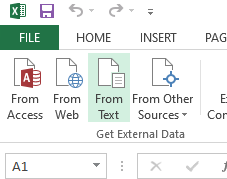

2. 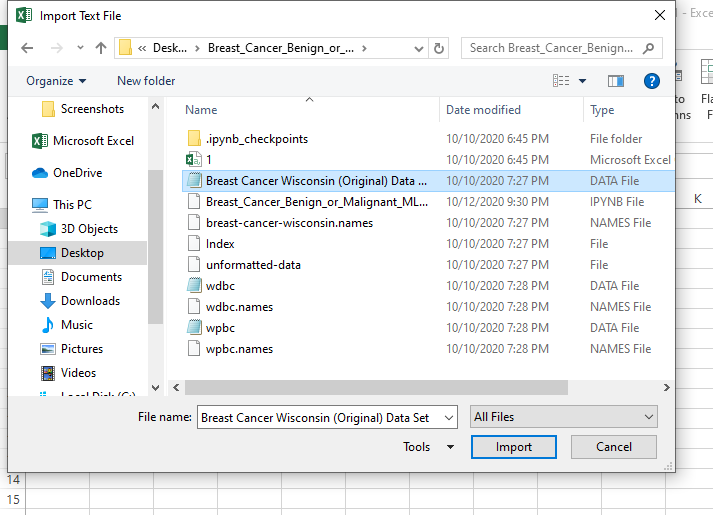

3. 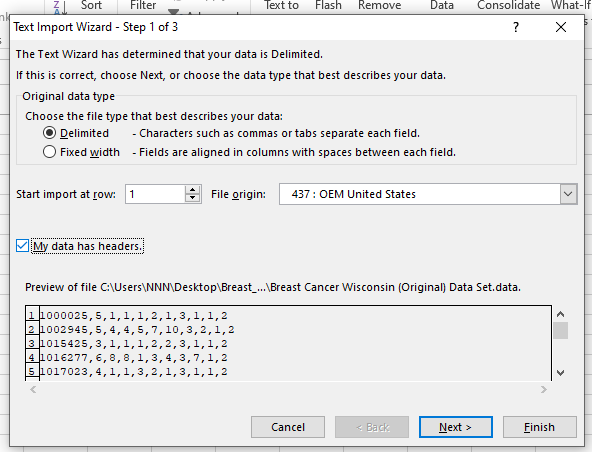

4. 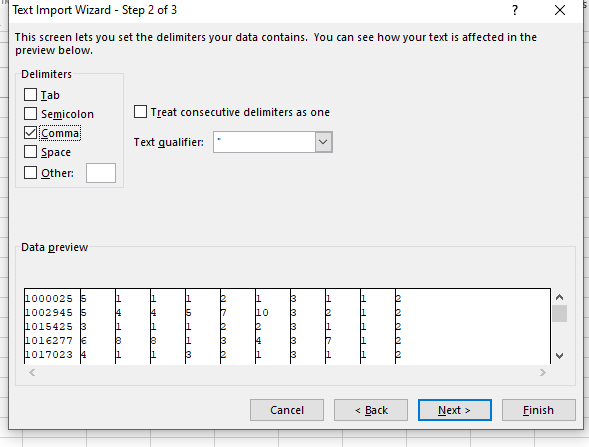

5. 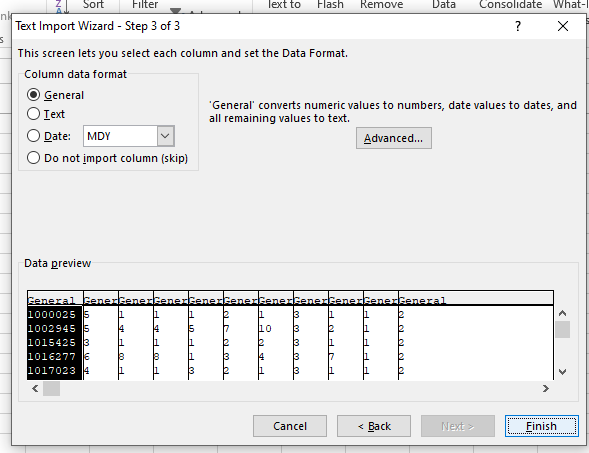

6. 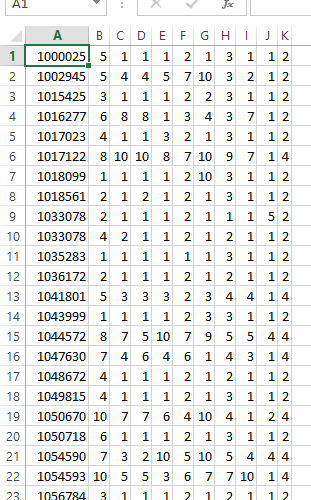

7. 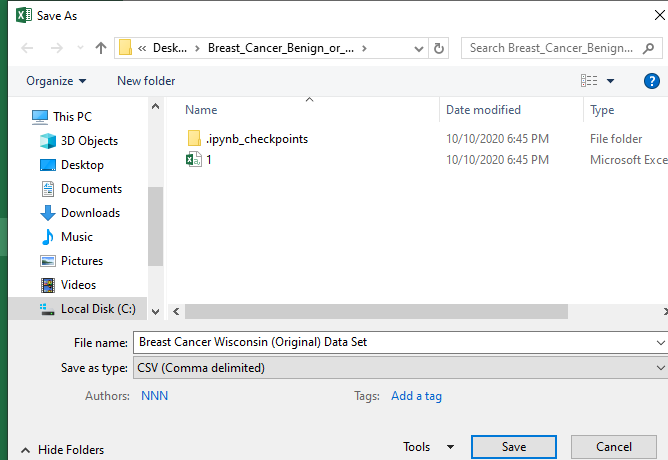

**Importing the Libraries**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Reading the Raw Dataset** 

In [8]:
raw_ds = pd.read_csv('Breast Cancer Wisconsin (Original) Data Set.csv')
raw_ds.head(20)

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


**Reading the Dataset with their Respective Columns**

In [9]:
ds = pd.read_csv('Breast Cancer Wisconsin (Original) Data Set.csv', 
                 names = ['Sample code number', 
                          'Clump Thickness',
                          'Uniformity of Cell Size',
                          'Uniformity of Cell Shape',
                          'Marginal Adhesion',
                          'Single Epithelial Cell Size',
                          'Bare Nuclei',
                          'Bland Chromatin',
                          'Normal Nucleoli',
                          'Mitoses',
                          'Class'])
print(ds.shape)
ds.head(20)

(699, 11)


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


**Columns in the Dataset**

In [10]:
for col in enumerate(ds.columns, 0):
    print(col)

(0, 'Sample code number')
(1, 'Clump Thickness')
(2, 'Uniformity of Cell Size')
(3, 'Uniformity of Cell Shape')
(4, 'Marginal Adhesion')
(5, 'Single Epithelial Cell Size')
(6, 'Bare Nuclei')
(7, 'Bland Chromatin')
(8, 'Normal Nucleoli')
(9, 'Mitoses')
(10, 'Class')


**Reading the dataset with useful Features (Eliminating the 'Sample code number' Column)**

In [11]:
ds = pd.read_csv('Breast Cancer Wisconsin (Original) Data Set.csv', 
                 usecols = list(range(1, 11)), 
                 names = ['Sample code number',
                          'Clump Thickness',
                          'Uniformity of Cell Size',
                          'Uniformity of Cell Shape',
                          'Marginal Adhesion',
                          'Single Epithelial Cell Size',
                          'Bare Nuclei',
                          'Bland Chromatin',
                          'Normal Nucleoli',
                          'Mitoses',
                          'Class'])
print(ds.shape)
ds.head(20)

(699, 10)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


**Columns in the Dataset after Eliminating the 'Sample code number' column**

In [12]:
for col in enumerate(ds.columns, 0):
    print(col)

(0, 'Clump Thickness')
(1, 'Uniformity of Cell Size')
(2, 'Uniformity of Cell Shape')
(3, 'Marginal Adhesion')
(4, 'Single Epithelial Cell Size')
(5, 'Bare Nuclei')
(6, 'Bland Chromatin')
(7, 'Normal Nucleoli')
(8, 'Mitoses')
(9, 'Class')


**General Info about the Dataset**

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


**'Bare Nuclei' Column is an 'object' dtype we need to convert it as 'int64' dtype**

In [14]:
ds['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

**16 Non-Numerical Values are there in 'Bare Nuclei' Column,**
**We can Eliminate those 16 Rows from the Dataset because it is an Negligible amount of Data**

In [15]:
print('%.2f'%((16/ds.shape[0])*100), '%')

2.29 %


**Shape of the Dataset Before Eliminating those 16 Rows**

In [16]:
print(ds.shape)

(699, 10)


**Replacing the '?' with NaN and Dropping those 16 Rows**

In [17]:
ds['Bare Nuclei'] = ds['Bare Nuclei'].replace({'?' : np.nan})
ds.dropna(inplace = True)
ds['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

**Shape of the Dataset After Eliminating those 16 Rows**

In [18]:
print(ds.shape)

(683, 10)


**Changing the dtype of the 'Bare Nuclei' Column**

In [19]:
ds['Bare Nuclei'] = ds['Bare Nuclei'].astype('int64')
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 58.7 KB


**Checking for the Null Values in Columns**

In [20]:
print('Columns :')
ds.isnull().sum()

Columns :


Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

**Checking for Unique values in Class Column**

In [21]:
ds['Class'].unique()

array([2, 4], dtype=int64)

**Replacing Values in Class Column [(Benign) 2 = 0 and (Malignant) 4 = 1]**

In [22]:
ds['Class'] = ds['Class'].replace({2 : 0, 
                                   4 : 1})
ds.head(20)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


**Visualizing the Dataset Column-wise**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020ED75A2490>,
      dtype=object)

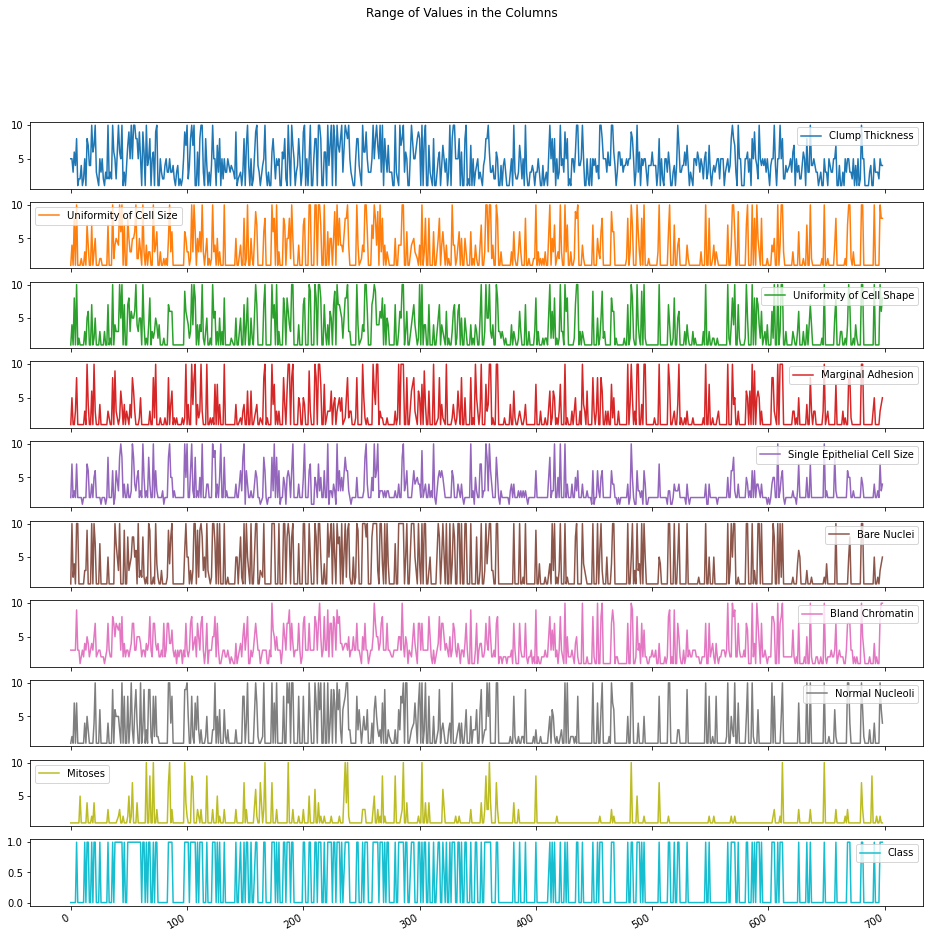

In [23]:
ds.plot(subplots = True, 
        figsize = (16, 16),
        title = 'Range of Values in the Columns')

**Grouping the Features with respect to their Classes by count to ensure it is a Balanced Dataset**

In [24]:
ds.groupby('Class').count()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Class,,,,,,,,,
0,444,444,444,444,444,444,444,444,444
1,239,239,239,239,239,239,239,239,239


**Visualizing the Features with respect to their Classes by count to ensure it is a Balanced Dataset**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020ED7F14E80>,
      dtype=object)

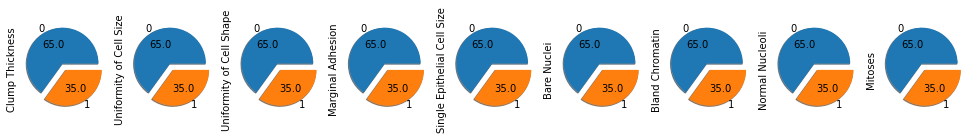

In [25]:
group_by_count = ds.groupby('Class').count()
group_by_count.plot.pie(subplots=True, 
                        figsize = (17, 17), 
                        autopct = '%.1f', 
                        legend = False,
                        shadow = True,
                        explode = (0.2, 0))

**The Dataset is Slightly Imbalanced 65/35, So Over Sampling the Dataset to make it as 60/40**

In [26]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 0.65, 
                        random_state = 0)
x_bal, y_bal = ros.fit_sample(ds.iloc[:, :-1].values, ds.iloc[:, -1].values)

In [27]:
x_bal = pd.DataFrame(x_bal, 
                     columns = ['Clump Thickness',
                                'Uniformity of Cell Size',
                                'Uniformity of Cell Shape',
                                'Marginal Adhesion',
                                'Single Epithelial Cell Size',
                                'Bare Nuclei',
                                'Bland Chromatin',
                                'Normal Nucleoli',
                                'Mitoses'])
x_bal.head(20)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,5
9,4,2,1,1,2,1,2,1,1


In [28]:
y_bal = pd.DataFrame(y_bal, 
                     columns = ['Class'])
y_bal.head(20)

,Class
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


In [29]:
back_ds = [x_bal, y_bal]
ds_bal = pd.concat(back_ds, 
                   axis = 1)
print(ds_bal.shape)
ds_bal.head(20)

(732, 10)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


**Slightly Imbalanced 65/35 to Balanced 60/40**

In [30]:
ds_bal.groupby('Class').count()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Class,,,,,,,,,
0,444,444,444,444,444,444,444,444,444
1,288,288,288,288,288,288,288,288,288


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020ED8739BB0>,
      dtype=object)

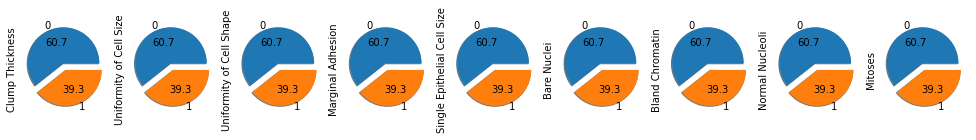

In [31]:
group_by_count = ds_bal.groupby('Class').count()
group_by_count.plot.pie(subplots=True, 
                        figsize = (17, 17), 
                        autopct = '%.1f', 
                        legend = False,
                        shadow = True,
                        explode = (0.2, 0))

**Statistical Details of the Dataset**

In [32]:
ds_bal.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,4.672131,3.408470,3.468579,3.001366,3.383880,3.795082,3.621585,3.061475,1.669399,0.393443
std,2.900378,3.186168,3.110874,2.959600,2.306575,3.755391,2.510220,3.183884,1.826988,0.488848
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,7.000000,5.000000,6.000000,4.000000,4.000000,8.000000,5.000000,4.250000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [33]:
ds_bal.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.656088,0.672184,0.493608,0.534345,0.590526,0.566915,0.530155,0.349204,0.731759
Uniformity of Cell Size,0.656088,1.000000,0.905789,0.703971,0.741076,0.675605,0.758253,0.723833,0.432610,0.819766
Uniformity of Cell Shape,0.672184,0.905789,1.000000,0.681032,0.714994,0.700507,0.737304,0.716394,0.422994,0.820437
Marginal Adhesion,0.493608,0.703971,0.681032,1.000000,0.594288,0.643621,0.663879,0.598113,0.419551,0.694594
Single Epithelial Cell Size,0.534345,0.741076,0.714994,0.594288,1.000000,0.565475,0.604214,0.621367,0.460607,0.687223
Bare Nuclei,0.590526,0.675605,0.700507,0.643621,0.565475,1.000000,0.685999,0.563274,0.320094,0.810009
Bland Chromatin,0.566915,0.758253,0.737304,0.663879,0.604214,0.685999,1.000000,0.667375,0.321382,0.761391
Normal Nucleoli,0.530155,0.723833,0.716394,0.598113,0.621367,0.563274,0.667375,1.000000,0.407058,0.702521
Mitoses,0.349204,0.432610,0.422994,0.419551,0.460607,0.320094,0.321382,0.407058,1.000000,0.410822
Class,0.731759,0.819766,0.820437,0.694594,0.687223,0.810009,0.761391,0.702521,0.410822,1.000000


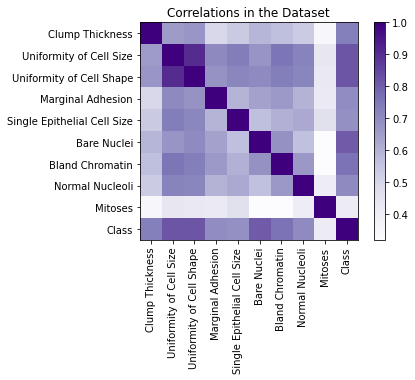

In [34]:
plt.imshow(ds_bal.corr(), 
           cmap = 'Purples')
plt.xticks(list(range(0, len(ds_bal.corr()))), 
           labels = ds_bal.columns, 
           rotation = 'vertical')
plt.yticks(list(range(0, len(ds_bal.corr()))), 
           labels = ds_bal.columns, 
           rotation = 'horizontal')
plt.title('Correlations in the Dataset')
plt.colorbar()

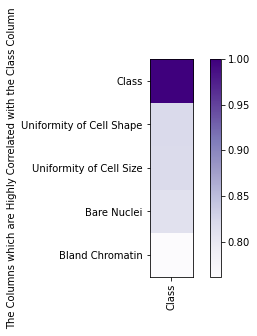

In [35]:
desc_corr = pd.DataFrame(ds_bal.corr()['Class'].sort_values(ascending = False))
high_corr = desc_corr.nlargest(n = 5, 
                               columns = ['Class'])
plt.imshow(high_corr, 
           cmap = 'Purples')
plt.xticks(list(range(0, 1)), 
           labels = high_corr.columns, 
           rotation = 'vertical')
plt.yticks(list(range(0, len(high_corr))), 
           labels = high_corr.index, 
           rotation = 'horizontal')
plt.ylabel('The Columns which are Highly Correlated with the Class Column')
plt.colorbar()

**x = Independent Features, y = Dependent Feature**

In [36]:
x = ds_bal.iloc[:, :-1].values
y = ds_bal.iloc[:, -1].values

In [37]:
print(x)

[[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5  8  9 ...  7  1  1]
 [10 10 10 ...  8  9  1]
 [10  6  6 ...  9  7  1]]


In [38]:
print(y)

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

**Splitting the dataset into Train set and Test set**

In [39]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, 
                                                y,
                                                test_size = 0.2, 
                                                random_state = 0)

**Scaling the Features**

In [40]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
xtrain = mms.fit_transform(xtrain)
xtest = mms.transform(xtest)
print('Scaled xtrain =', xtrain)
print('Scaled xtest =', xtest)

Scaled xtrain = [[0.66666667 0.44444444 0.55555556 ... 0.66666667 0.88888889 0.33333333]
 [0.22222222 0.         0.11111111 ... 0.         0.         0.        ]
 [0.66666667 0.77777778 0.77777778 ... 0.66666667 0.11111111 0.22222222]
 ...
 [0.22222222 0.         0.         ... 0.11111111 0.         0.        ]
 [1.         0.88888889 0.66666667 ... 0.66666667 0.66666667 0.        ]
 [0.66666667 0.22222222 0.33333333 ... 0.22222222 0.11111111 0.66666667]]
Scaled xtest = [[0.         0.         0.         ... 0.22222222 0.         0.        ]
 [0.         0.         0.         ... 0.22222222 0.         0.        ]
 [0.77777778 0.66666667 0.44444444 ... 0.44444444 0.44444444 0.33333333]
 ...
 [0.22222222 0.         0.         ... 0.22222222 0.11111111 0.        ]
 [0.33333333 0.66666667 0.77777778 ... 0.88888889 0.         0.        ]
 [0.77777778 1.         1.         ... 0.66666667 0.77777778 0.        ]]


**Shape of xtrain and xtest Before Dimensionality Reduction**

In [41]:
print(xtrain.shape)
print(xtest.shape)

(585, 9)
(147, 9)


**Dimensionality Reduction - Principal Component Analysis** 

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 0)
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)
print('Singular Values =', pca.singular_values_)
print('PCs =', pca.explained_variance_ratio_)

Singular Values = [19.47990987  6.60726034]
PCs = [0.89682454 0.10317546]


**Shape of xtrain and xtest After Dimensionality Reduction**

In [43]:
print(xtrain.shape)
print(xtest.shape)

(585, 2)
(147, 2)


## 2. Training the Dataset in Classification Models

**Logistic Regression Model**

In [44]:
# Training the Dataset in Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

**Support Vector Machine Model**

In [45]:
# Training the Dataset in SVM
from sklearn.svm import SVC
svm = SVC(random_state = 0)
svm.fit(xtrain, ytrain)

SVC(random_state=0)

**K-Nearest Neighbors Model**

In [46]:
# Training the Dataset in K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

**Decision Tree Classification Model**

In [47]:
# Training the Dataset in Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=0)

**Random Forest Classification Model**

In [48]:
# Training the Dataset in Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)
rf.fit(xtrain, ytrain)

RandomForestClassifier(random_state=0)

## 3. Evaluating the Performance of the Models

**Logistic Regression Model**

In [49]:
# Classification Accuracy Score
from sklearn.metrics import accuracy_score
ypred_log = log_reg.predict(xtest)
class_acc_log = accuracy_score(ytest, 
                               ypred_log)*100

# K-Fold Cross Validation Accuracy Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(estimator = log_reg,
                     X = xtrain,
                     y = ytrain,
                     cv = 10)
cv_acc_log = cv.mean()*100

# Grid Search Cross Validation Accuracy Score
from sklearn.model_selection import GridSearchCV
par = [{'C': [0.25, 0.5, 0.75, 1], 
        'penalty': ['l1', 'l2', 'elasticnet']}]
gs = GridSearchCV(estimator = log_reg,
                  cv = 10,
                  param_grid = par,
                  scoring = 'accuracy',
                  n_jobs = -1)
gs.fit(xtrain, ytrain)
print('Best Parameters :', gs.best_params_)
gs_acc_log = gs.best_score_*100

Best Parameters : {'C': 0.25, 'penalty': 'l2'}


**Support Vector Machine Model**

In [50]:
# Classification Accuracy Score
from sklearn.metrics import accuracy_score
ypred_svm = svm.predict(xtest)
class_acc_svm = accuracy_score(ytest, 
                               ypred_svm)*100

# K-Fold Cross Validation Accuracy Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(estimator = svm,
                     X = xtrain,
                     y = ytrain,
                     cv = 10)
cv_acc_svm = cv.mean()*100

# Grid Search Cross Validation Accuracy Score
from sklearn.model_selection import GridSearchCV
par = [{'C': [0.25, 0.5, 0.75, 1], 
        'kernel': ['linear']},
              
       {'C': [0.25, 0.5, 0.75, 1], 
        'kernel': ['rbf', 'poly', 'sigmoid'], 
        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
gs = GridSearchCV(estimator = svm,
                  cv = 10,
                  param_grid = par,
                  scoring = 'accuracy',
                  n_jobs = -1)
gs.fit(xtrain, ytrain)
print('Best Parameters :', gs.best_params_)
gs_acc_svm = gs.best_score_*100

Best Parameters : {'C': 0.75, 'gamma': 0.9, 'kernel': 'sigmoid'}


**K-Nearest Neighbors Model**

In [51]:
# Classification Accuracy Score
from sklearn.metrics import accuracy_score
ypred_knn = knn.predict(xtest)
class_acc_knn = accuracy_score(ytest, 
                               ypred_knn)*100

# K-Fold Cross Validation Accuracy Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(estimator = knn,
                     X = xtrain,
                     y = ytrain,
                     cv = 10)
cv_acc_knn = cv.mean()*100

# Grid Search Cross Validation Accuracy Score
from sklearn.model_selection import GridSearchCV
par = [{'n_neighbors' : list(range(1, 10)),
        'p' : [1, 2]}]
gs = GridSearchCV(estimator = knn,
                  cv = 10,
                  param_grid = par,
                  scoring = 'accuracy',
                  n_jobs = -1)
gs.fit(xtrain, ytrain)
print('Best Parameters :', gs.best_params_)
gs_acc_knn = gs.best_score_*100

Best Parameters : {'n_neighbors': 9, 'p': 1}


**Decision Tree Classification Model**

In [52]:
# Classification Accuracy Score
from sklearn.metrics import accuracy_score
ypred_dt = dt.predict(xtest)
class_acc_dt = accuracy_score(ytest, 
                              ypred_dt)*100

# K-Fold Cross Validation Accuracy Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(estimator = dt,
                     X = xtrain,
                     y = ytrain,
                     cv = 10)
cv_acc_dt = cv.mean()*100

# Grid Search Cross Validation Accuracy Score
from sklearn.model_selection import GridSearchCV
par = [{'criterion' : ['gini', 'entropy'],
        'min_samples_leaf' : np.linspace(0.1, 1.0, 10),
        'min_samples_split' : np.linspace(0.1, 1.0, 10), 
        'max_leaf_nodes' : list(range(1, 10)), 
        'max_depth' : list(range(1, 10))}]
gs = GridSearchCV(estimator = dt,
                  cv = 10,
                  param_grid = par,
                  scoring = 'accuracy',
                  n_jobs = -1)
gs.fit(xtrain, ytrain)
print('Best Parameters :', gs.best_params_)
gs_acc_dt = gs.best_score_*100

Best Parameters : {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}


**Random Forest Classification Model**

In [53]:
# Classification Accuracy Score
from sklearn.metrics import accuracy_score
ypred_rf = rf.predict(xtest)
class_acc_rf = accuracy_score(ytest, 
                              ypred_rf)*100

# K-Fold Cross Validation Accuracy Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(estimator = rf,
                     X = xtrain,
                     y = ytrain,
                     cv = 10)
cv_acc_rf = cv.mean()*100

# Grid Search Cross Validation Accuracy Score
from sklearn.model_selection import GridSearchCV
par = [{'n_estimators' : list(range(100, 300, 100)),
        'criterion' : ['gini', 'entropy'], 
        'max_depth' : list(range(1, 3)),
        'bootstrap' : [True, False]}]
gs = GridSearchCV(estimator = rf,
                  cv = 10,
                  param_grid = par,
                  scoring = 'accuracy',
                  n_jobs = -1)
gs.fit(xtrain, ytrain)
print('Best Parameters :', gs.best_params_)
gs_acc_rf = gs.best_score_*100

Best Parameters : {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 1, 'n_estimators': 100}


## 4. Visualizing the Performance of the Models

**Logistic Regression Model**

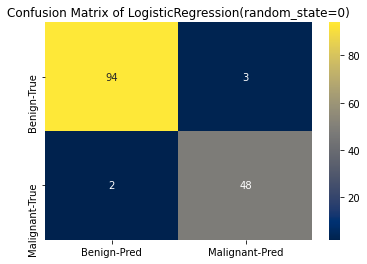

In [54]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.title('Confusion Matrix of ' + str(log_reg))
sns.heatmap(confusion_matrix(ytest, ypred_log), 
            annot = True,
            cmap = 'cividis',
            xticklabels = ['Benign-Pred', 'Malignant-Pred'], 
            yticklabels = ['Benign-True', 'Malignant-True'])

In [55]:
# Logistic Regression Result Table
result_log = {'Classification Accuracy' : class_acc_log, 
              'K - FoldCV Accuracy' :  cv_acc_log, 
              'Grid SearchCV Accuracy' : gs_acc_log}
result_log = pd.DataFrame(result_log, 
                          index = ['Logistic Regression'])
result_log

,Classification Accuracy,K - FoldCV Accuracy,Grid SearchCV Accuracy
Logistic Regression,96.598639,96.233197,96.233197


**Support Vector Machine Model**

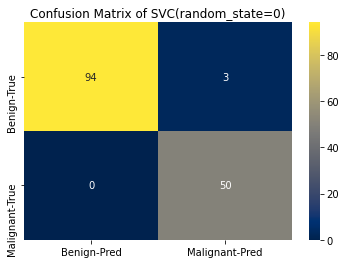

In [56]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.title('Confusion Matrix of ' + str(svm))
sns.heatmap(confusion_matrix(ytest, ypred_svm), 
            annot = True,
            cmap = 'cividis',
            xticklabels = ['Benign-Pred', 'Malignant-Pred'], 
            yticklabels = ['Benign-True', 'Malignant-True'])

In [57]:
# SVM Result Table
result_svm = {'Classification Accuracy' : class_acc_svm, 
              'K - FoldCV Accuracy' :  cv_acc_svm, 
              'Grid SearchCV Accuracy' : gs_acc_svm}
result_svm = pd.DataFrame(result_svm, 
                          index = ['Support Vector Machine'])
result_svm

,Classification Accuracy,K - FoldCV Accuracy,Grid SearchCV Accuracy
Support Vector Machine,97.959184,96.931619,96.922852


**K-Nearest Neighbors Model**

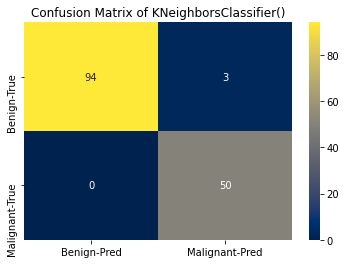

In [58]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.title('Confusion Matrix of ' + str(knn))
sns.heatmap(confusion_matrix(ytest, ypred_knn), 
            annot = True,
            cmap = 'cividis',
            xticklabels = ['Benign-Pred', 'Malignant-Pred'], 
            yticklabels = ['Benign-True', 'Malignant-True'])

In [59]:
# K-NN Result Table
result_knn = {'Classification Accuracy' : class_acc_knn, 
              'K - FoldCV Accuracy' :  cv_acc_knn, 
              'Grid SearchCV Accuracy' : gs_acc_knn}
result_knn = pd.DataFrame(result_knn, 
                          index = ['K-Nearest Neighbors'])
result_knn

,Classification Accuracy,K - FoldCV Accuracy,Grid SearchCV Accuracy
K-Nearest Neighbors,97.959184,96.244886,96.928697


**Decision Tree Classification Model**

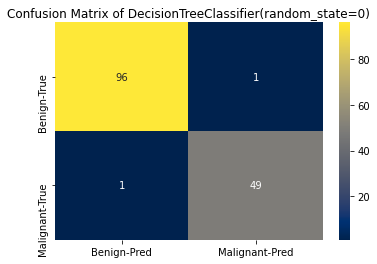

In [60]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.title('Confusion Matrix of ' + str(dt))
sns.heatmap(confusion_matrix(ytest, ypred_dt), 
            annot = True,
            cmap = 'cividis',
            xticklabels = ['Benign-Pred', 'Malignant-Pred'], 
            yticklabels = ['Benign-True', 'Malignant-True'])

In [61]:
# Decision Tree Classification Result Table
result_dt = {'Classification Accuracy' : class_acc_dt, 
             'K - FoldCV Accuracy' :  cv_acc_dt, 
             'Grid SearchCV Accuracy' : gs_acc_dt}
result_dt = pd.DataFrame(result_dt, 
                         index = ['Decision Tree Classification'])
result_dt

,Classification Accuracy,K - FoldCV Accuracy,Grid SearchCV Accuracy
Decision Tree Classification,98.639456,95.730567,97.443016


**Random Forest Classification Model**

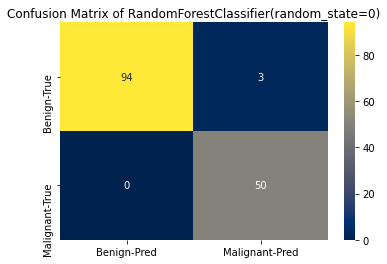

In [62]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.title('Confusion Matrix of ' + str(rf))
sns.heatmap(confusion_matrix(ytest, ypred_rf), 
            annot = True,
            cmap = 'cividis',
            xticklabels = ['Benign-Pred', 'Malignant-Pred'], 
            yticklabels = ['Benign-True', 'Malignant-True'])

In [63]:
# Random Forest Classification Result Table
result_rf = {'Classification Accuracy' : class_acc_rf, 
             'K - FoldCV Accuracy' :  cv_acc_rf, 
             'Grid SearchCV Accuracy' : gs_acc_rf}
result_rf = pd.DataFrame(result_rf, 
                         index = ['Random Forest Classification'])
result_rf

,Classification Accuracy,K - FoldCV Accuracy,Grid SearchCV Accuracy
Random Forest Classification,97.959184,96.244886,97.61543


## 5. Summarizing the Performance of the Models

**Concatenation of All Results**

In [64]:
list_of_results = [result_log, result_svm, result_knn, result_dt, result_rf]
results = pd.concat(list_of_results)
results

,Classification Accuracy,K - FoldCV Accuracy,Grid SearchCV Accuracy
Logistic Regression,96.598639,96.233197,96.233197
Support Vector Machine,97.959184,96.931619,96.922852
K-Nearest Neighbors,97.959184,96.244886,96.928697
Decision Tree Classification,98.639456,95.730567,97.443016
Random Forest Classification,97.959184,96.244886,97.615430


**Standard Deviation of the results along Columns**

In [65]:
results_std = pd.DataFrame({'Standard Deviation' : results.std(axis = 1)})
results_std = pd.DataFrame(results_std['Standard Deviation'].sort_values(ascending = True))
results_std

,Standard Deviation
Logistic Regression,0.210988
Support Vector Machine,0.595812
K-Nearest Neighbors,0.862971
Random Forest Classification,0.906952
Decision Tree Classification,1.462052


**Sorting and Plotting with respect to Grid SearchCV Accuracy Column**

In [66]:
results_gsa = pd.DataFrame(results['Grid SearchCV Accuracy'].sort_values(ascending = False))
results_gsa

,Grid SearchCV Accuracy
Random Forest Classification,97.615430
Decision Tree Classification,97.443016
K-Nearest Neighbors,96.928697
Support Vector Machine,96.922852
Logistic Regression,96.233197


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020EE13C0340>],
      dtype=object)

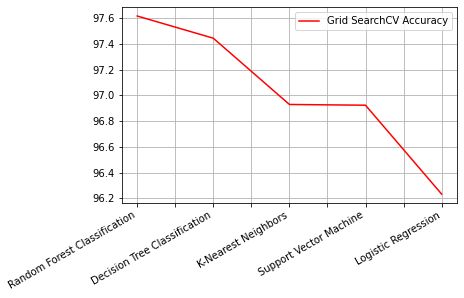

In [67]:
results_gsa.plot(subplots = True, color = 'red', legend = True, grid = True)

**Sorting and Plotting with respect to K - FoldCV Accuracy Column**

In [68]:
results_kfa = pd.DataFrame(results['K - FoldCV Accuracy'].sort_values(ascending = False))
results_kfa

,K - FoldCV Accuracy
Support Vector Machine,96.931619
Random Forest Classification,96.244886
K-Nearest Neighbors,96.244886
Logistic Regression,96.233197
Decision Tree Classification,95.730567


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020EDC58DC10>],
      dtype=object)

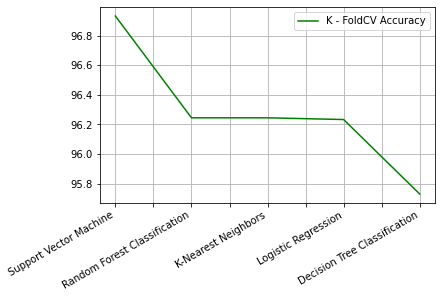

In [69]:
results_kfa.plot(subplots = True, color = 'green', legend = True, grid = True)

**Sorting and Plotting with respect to Classification Accuracy Column**

In [70]:
results_cac = pd.DataFrame(results['Classification Accuracy'].sort_values(ascending = False))
results_cac

,Classification Accuracy
Decision Tree Classification,98.639456
Random Forest Classification,97.959184
K-Nearest Neighbors,97.959184
Support Vector Machine,97.959184
Logistic Regression,96.598639


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020EDD8CB9A0>],
      dtype=object)

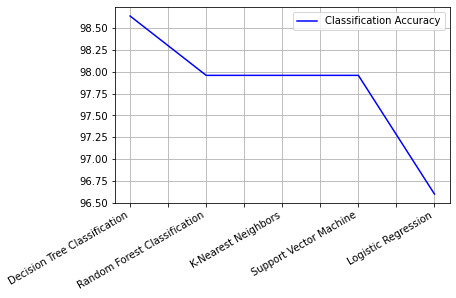

In [71]:
results_cac.plot(subplots = True, color = 'blue', legend = True, grid = True)

## 6. Inference about the Performance of the Models

We can conclude that the **Ensemble Learning Bagging method - Random Forest Classification** is the *Best one* for this Dataset among these models, which gives **High Accuracy** with GridSearchCV Hyperparameter Tuning and it also ranked 2nd in cross_val_score Accuracy and Classification Accuracy.

**Note** **:** No parameters where given in the Training of cross_val_score Accuracy and Classification Accuracy, so GridSearchCV Accuracy firstly prioritized and it also gives us the Best Parameters of the models for this Dataset.